# Primeiro Exercício para Nota - Busca Heurística com A*

## Aluno: Marvson Allan

![Imagem de unsplash](https://images.unsplash.com/photo-1540835296355-c04f7a063cbb?crop=entropy&cs=tinysrgb&fit=max&fm=jpg&ixid=MXwxfDB8MXxyYW5kb218fHx8fHx8fA&ixlib=rb-1.2.1&q=80&w=1080)

A* (lido como "A-Estrela") é um algoritmo de busca que utiliza uma heurística para obter um resultado ótimo com o mínimo de expansões de nós, desde que a heurística escolhida siga algumas condições. Comparando com outros algoritmos como busca em largura e profundidade, A* acaba sendo muito melhor em algumas situações específicas, mas falha em quesito de tempo e espaço em outros. O cubo de Rubik é um exemplo onde o A* original não vai muito bem. O fator de expansão do problema certamente é bem grande pois a liberdade de movimento também é. São catorze movimentos possíveis a cada passo para o cubo de Rubik! Nesse caso, usa-se uma versão diferente do A* que se parece mais com busca em profundidade que em largura.

Nesse exercício não iremos solucionar o problema do cubo de rubik, mas sim o jogo dos n números, para o caso de n igual a 8. Existem variantes do jogo com 15 ou mais números, mas iremos focar na variante com 8 números.

In [1]:
# Importando Funções Necessárias para Ilustração
from plot import puzzle_simple, puzzle_step, puzzle_solution

## O Jogo

![Brinquedo com Jogo dos 8 números](https://ae01.alicdn.com/kf/HTB1XTpffpOWBuNjy0Fiq6xFxVXaG/Eight-Sliding-Tiles-IQ-Game-Toys-8-Puzzle-Math-Wooden-Brain-Teaser-Puzzle-Numbers-1-8.jpg)

O objetivo do jogo é chegar na configuração da figura acima, isto é, os números em ordem crescente da esquerda para direita, com o espaço vazio no canto inferior direito. As ações do jogo são basicamente mover as peças para o espaço vazio de modo a rearanjar a configuração até chegar o estado final. Não vale tirar as peças e colocar no lugar já certo, embora muita gente faça isso, mas seja mais comum com o cubo de rubik. Mesmo assim, essa ideia de tirar as peças e colocar no lugar é um conceito interessante. Imediamente pensamos que o jogo seria muito mais fácil assim! Nem mesmo seria um desafio.

## Formulação do Problema

Dado um estado inicial caracterizado por uma combinação dos oito números e o espaço vazio num grid quadro três por três, qual a sequência de ações, movendo as peças para o espaço vazio precisamos tomar para chegar ao estado final, os oito números em ordem e o espaço vazio no canto inferior esquedo? Antes de irmos adiante com a solução, vamos formular melhor o problema indo a fundo em cada uma das partes do problema:

### Estado Inicial

Uma pergunta que vem a mente logo de início é: todos os estados iniciais são resolvíveis? E a resposta é não. Apenas metade deles tem solução. O motivo é um pouco complicado, mas o importante é que podemos caracterizar nosso estado inicial de forma inteligente para evitar instancias do problema sem solução:

`Toda combinação de 8 números (de 1 a 8) e o espaço vazio que representam uma instância do problema com solução`

É possível garantirmos que um estado inicial é seguro? Sim, e é bem simples. Suponha que temos o problema:

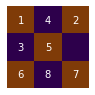

In [2]:
puzzle_simple("14235 687")

Como podemos garantir se esse estado tem solução? Dado a representação linear `14235 687`, para cada i entre 0 e 9 e para cada j entre i e 9, compare o número na posição i com o da posição j, se num(i) > num(j), conte uma *inversão*. Se o número de inversões for par, a instância tem solução, caso contrário, não tem.

Podemos então gerar instâncias solucionáveis simplesmente gerando instâncias aleatoriamente até uma solucionável aparecer. Como metade das instâncias são solucionáveis, então 50% de chances é muito bom e eficiente para essa estratégia simples.

### Espaço de Ações

Existem duas formas principais de encararmos as ações do jogo dos 8 números. Se considerarmos que as peças se movem, então existe uma ação para movimento de cada peça, como na instância anterioemente mostrada, mover a peça 2 para baixo. Outra forma é considerarmos que o espaço em branco é que se move. Nesse caso temos apenas quatro ações possíveis, que dependendo se o vazio está na borda ou não, pode se limitar a até duas somente.

Nosso espaço de ações inclui:

`Cima, baixo, esquerda, direita, movimentando o espaço em branco se ação for possível`

### Espaço de Estados

Nosso espaço de estados pode ser trivialmente definido como todos os estados alcançáveis a partir de instâncias com solução do tabuleiro do jogo dos 8 números, aplicando as ações possíveis a cada etapa. Se considerarmos todas as variações, perdemos a facilidade de todas terem solução.

`todos os estados alcançáveis a partir de instâncias com solução do tabuleiro do jogo dos 8 números, aplicando as ações possíveis a cada etapa`

### Estados Terminais

Há apenas um estado terminal:

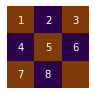

In [3]:
puzzle_simple("12345678 ")

## Definição do Problema

* Espaço de Ações: cima, baixo, esquerda, direita, movimentando o espaço em branco se ação for possível
* Espaço de Estados: todos os estados alcançáveis a partir de instâncias com solução do tabuleiro do jogo dos 8 números, aplicando as ações possíveis a cada etapa
* Estados Iniciais: Toda combinação de 8 números (de 1 a 8) e o espaço vazio que representam uma instância do problema com solução
* Estado Terminal: Estado descrito linearmente como "12345678 "

## Custo das Ações

Para esse problema, o custo de todas as ações é unitário. Mas seria interessante se por exemplo adicionássemos uma complicação somente para ficar mais divertido, e porque o código suporta isso. Vamos explorar depois uma instância do problema com ações que levem o espaço vazio para baixo custando mais que as que levam para cima.

## Heurística

Como falei na introdução, seria muito simples só desmontar o tabuleiro e colocar as peças no lugar, certo? Pois bem, essa foi a heurística escolhida, que intuitivamente é admissível, isto é, ela não superestima o custo real das ações. Mas indo mais a fundo, é simples verificar que ela de fato é admissível, basta ver que o número de ações para colocar cada peça no lugar é pelo menos uma se ela já não estiver no lugar. Para a implementação, simplesmente usei o número de posições que estão diferentes da posição terminal.

## Caso Base

Vamos começar pelo básico, resolvendo o tabuleiro proposto pela atividade com a heurística mais básica da troca dos elementos e custos unitários.

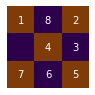

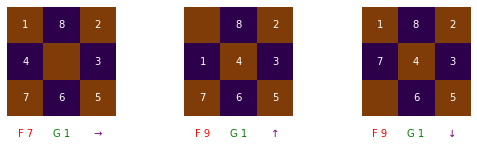

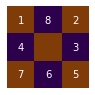

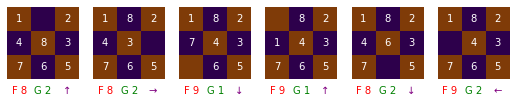

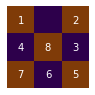

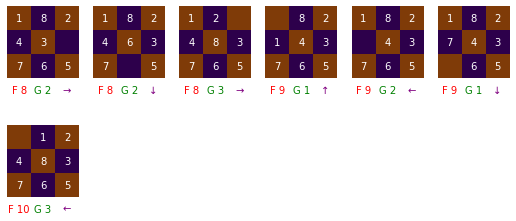

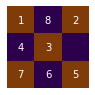

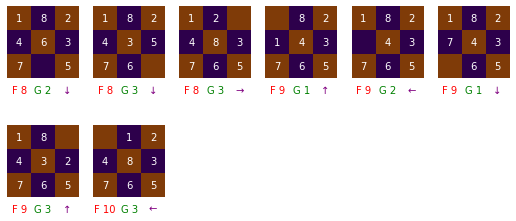

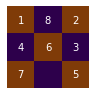

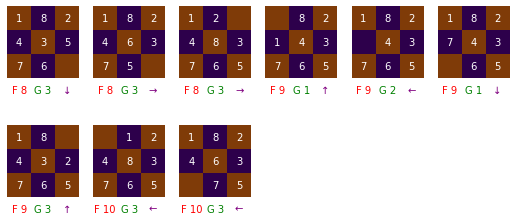

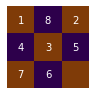

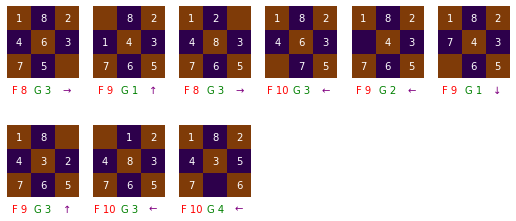

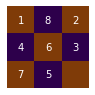

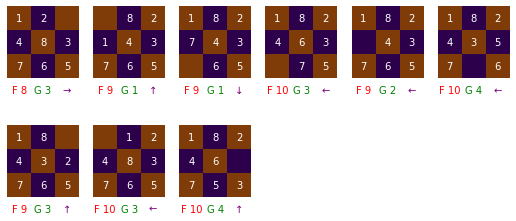

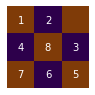

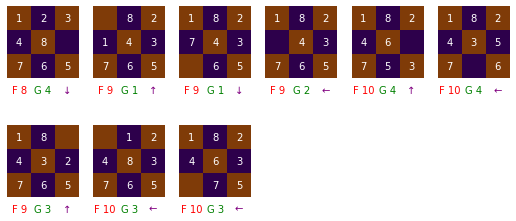

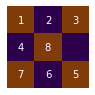

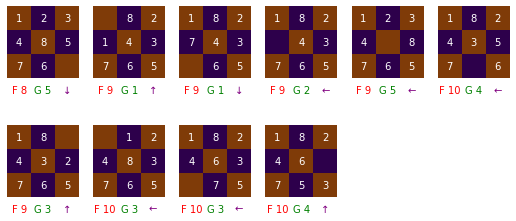

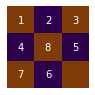

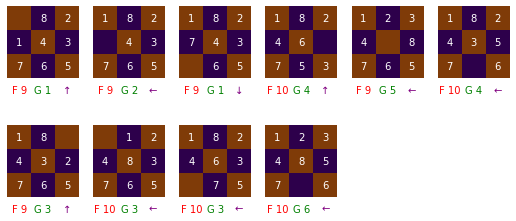

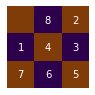

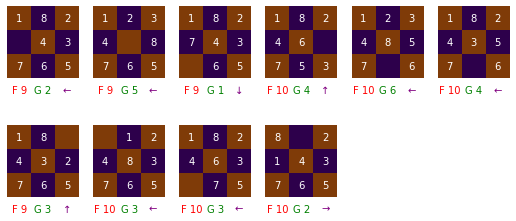

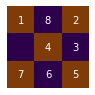

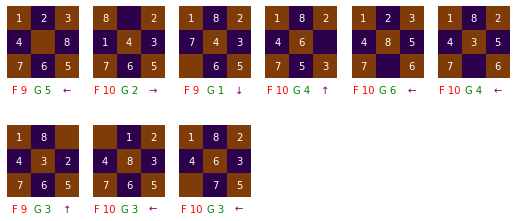

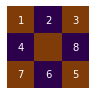

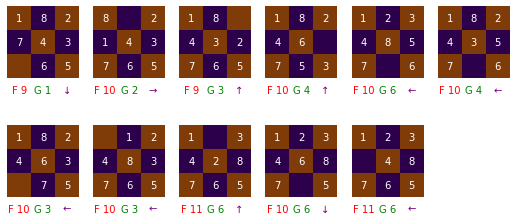

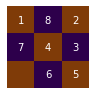

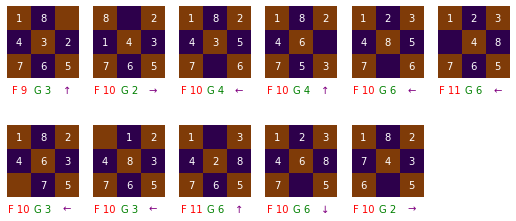

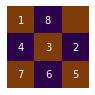

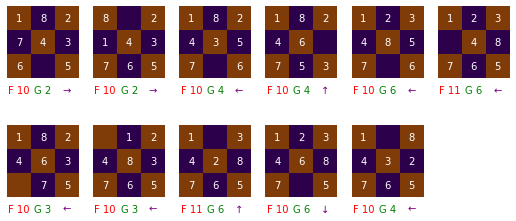

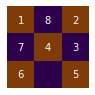

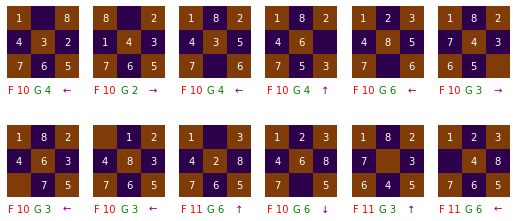

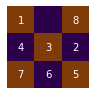

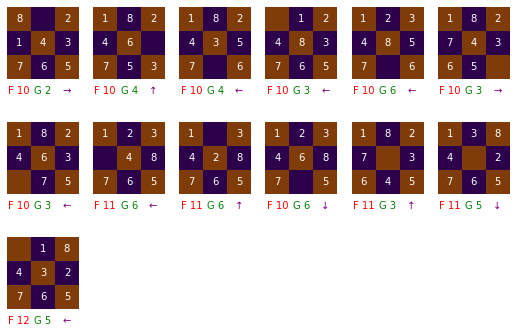

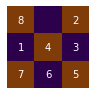

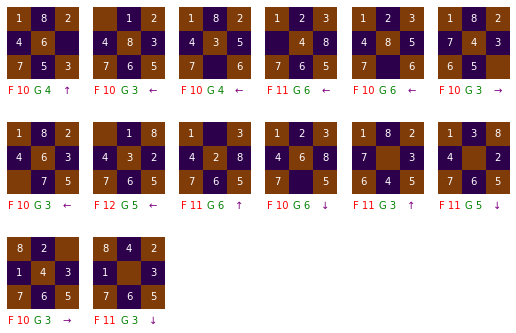

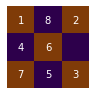

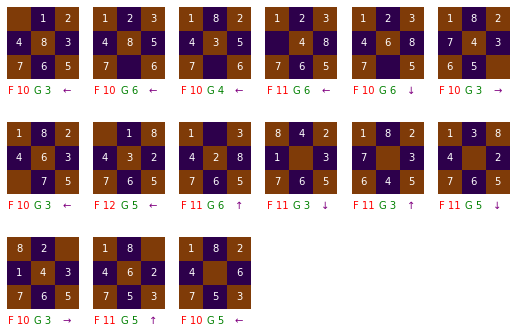

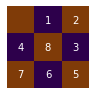

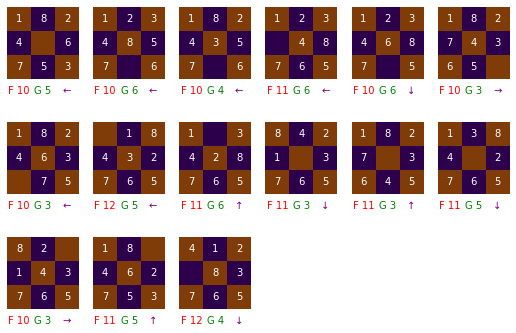

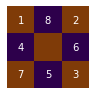

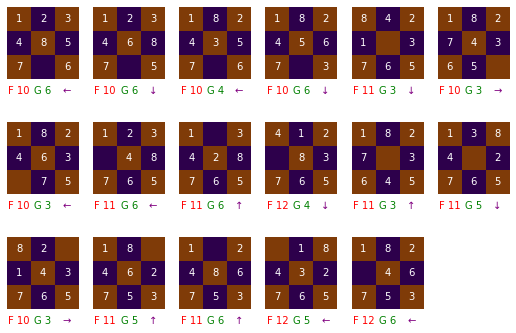

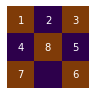

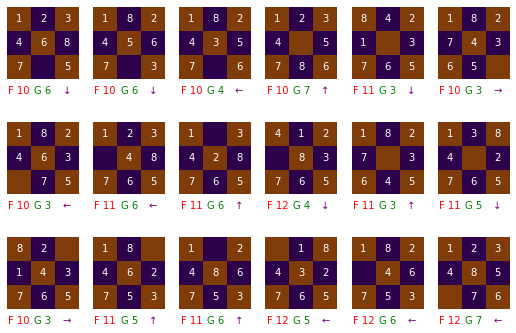

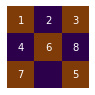

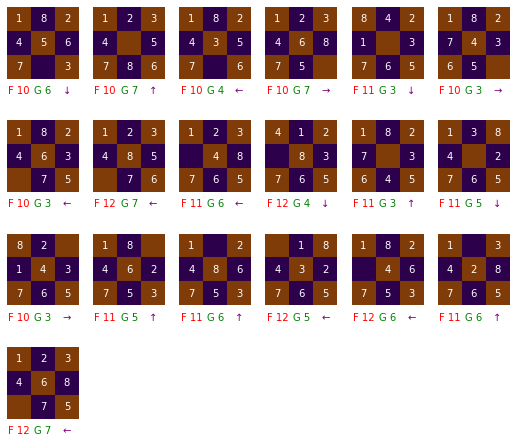

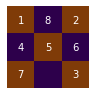

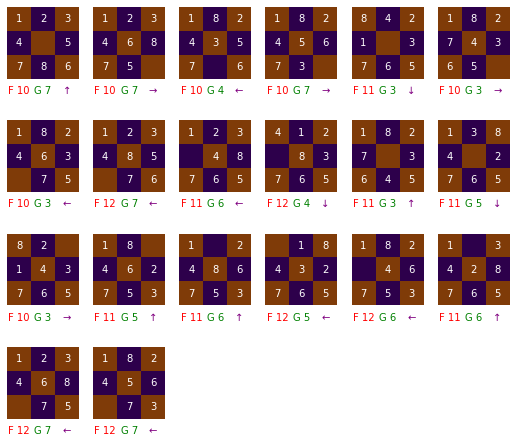

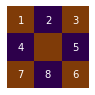

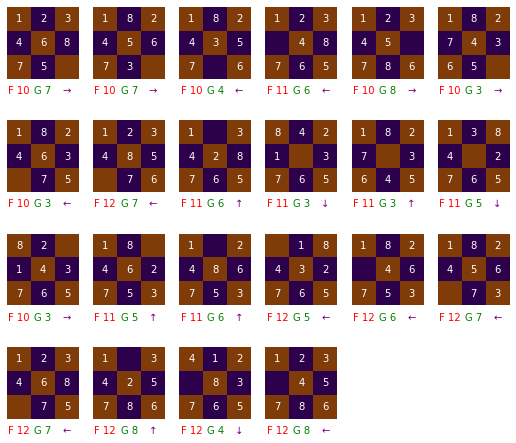

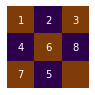

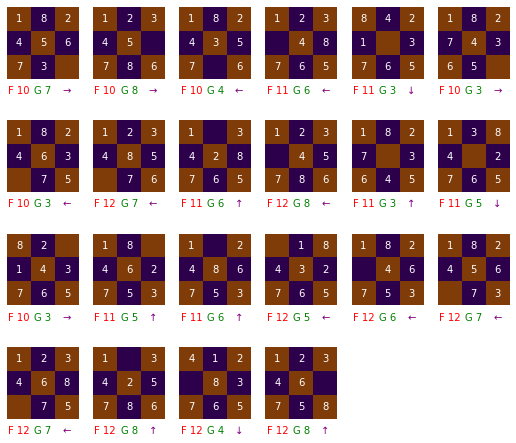

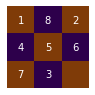

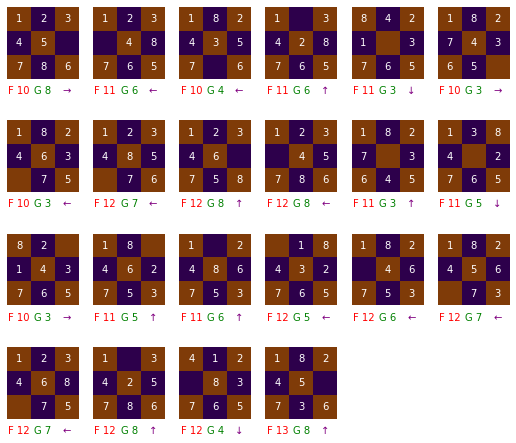

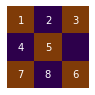

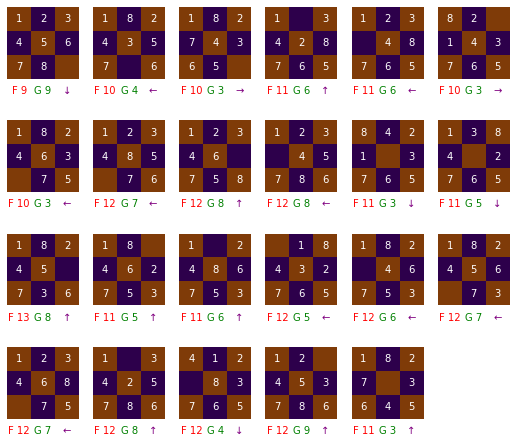

In [4]:
from astar import astar
from puzzle import states_from

initial = "182 43765"
terminal = "12345678 "

def h(state: str) -> float:
    return sum([state[i] != terminal[i] for i in range(9)])

def unit_cost(x: str, y: str) -> float:
    return 1

solution = astar(initial, unit_cost, states_from, h, terminal, puzzle_simple, puzzle_step)

No plot acima temos o nó visitado e a fronteira para cada iteração. Agora vamos ver a solução e o custo dela.

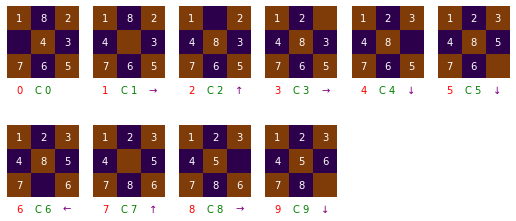

In [5]:
puzzle_solution(solution)

Com nove movimentos, o quebra cabeça se resolve! Agora que tal dificultarmos um pouco as coisas?

## Estado Inicial Aleatório

Agora vamos tentar gerar um estado inicial aleatório válido como na descrição do problema e colocar a solução. Vamos nos ater somente à solução e o custo e ignorar a fronteira dessa vez pra não ficar muito grande.

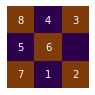

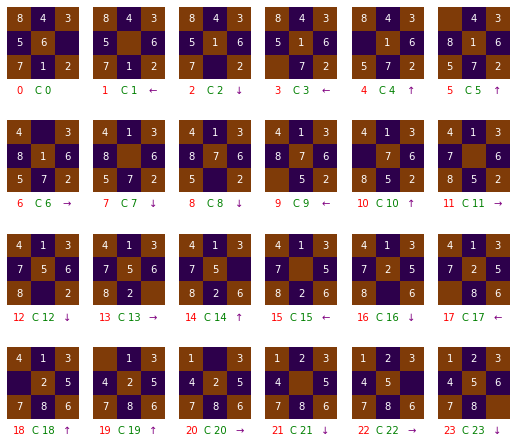

In [6]:
from puzzle import generate_solvable_state
initial_random = generate_solvable_state()

puzzle_simple(initial_random)
puzzle_solution(astar(initial_random, unit_cost, states_from, h, terminal))

Toda vez que rodamos de novo a célula acima, temos um novo problema e uma nova solução!

## Subir é mais caro

Agora vamos tentar a ideia de que ações para cima tem custo maior. Para isso vamos fazer uma nova função de custo.

In [7]:
from puzzle import action_of

def up_expensive(x: str, y: str) -> float:
    if action_of(x,y) == 0:
        return 2
    else:
        return 1

Como os custos vão aumentar, nossa heurística ainda é admissível e deve funcionar bem da mesma forma!

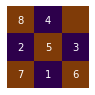

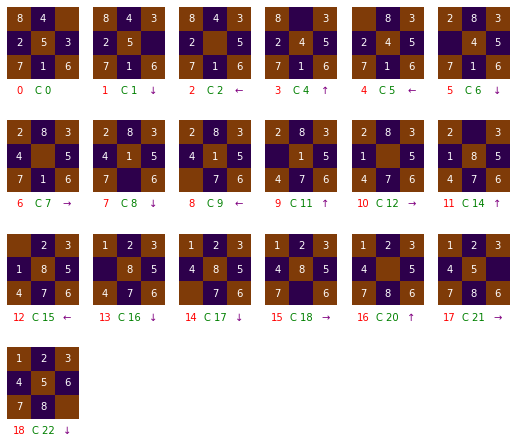

In [8]:
initial_random = generate_solvable_state()
puzzle_simple(initial_random)
puzzle_solution(astar(initial_random, up_expensive, states_from, h, terminal))

A solução não mudou muito... mas e se for muito mais caro?

In [9]:
def up_super_expensive(x: str, y: str) -> float:
    if action_of(x,y) == 0:
        return 100
    else:
        return 1

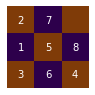

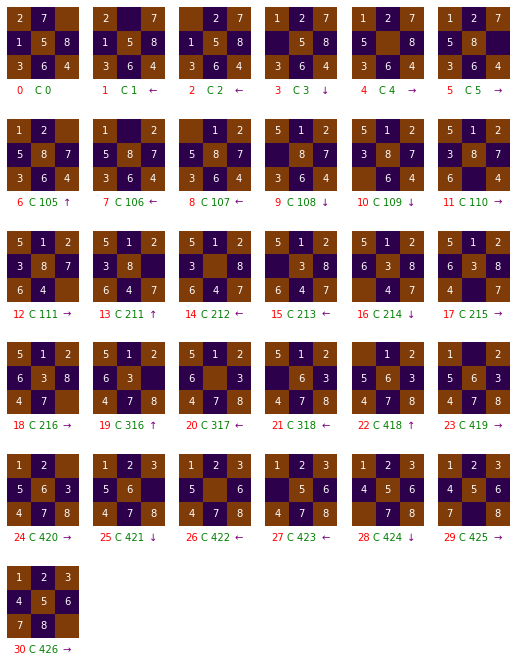

In [10]:
initial_random = generate_solvable_state()
puzzle_simple(initial_random)
puzzle_solution(astar(initial_random, up_super_expensive, states_from, h, terminal))

Eu esperava que a solução evitasse ir para cima, mas parando para pensar, ele precisa fazer isso a mesma quantidade de vezes. Só estou colocando pressão no coitado.

# Conclusão

Foi possível implementar uma função A* bem genérica e fazer alguns testes com o jogo dos 8 números.